In [116]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score,roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

# Dataset
- we have used the Early-stage diabetes risk prediction dataset available on the UCI Machine Learning  repository. 

- This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh, and    approved by a doctor. 

- This is a symptomatic dataset containing the symptoms of newly diabetic or would-be diabetic patients.

The datasets consist of 16 medical predictor variables and one target variable, class. The details of features in the dataset are given below:

1.	Age	
2.	Sex (Male/Female)	
3.	Polyuria (Yes/No)	
4.	Polydipsia (Yes/No)	
5.	sudden weight loss (Yes/No)	
6.	weakness (Yes/No)	
7.	Polyphagia (Yes/No)	
8.	Genital thrush (Yes/No)	
9.	visual blurring (Yes/No)	
10.	Itching (Yes/No)	
11.	Irritability (Yes/No)	
12.	delayed healing (Yes/No)	
13.	partial paresis (Yes/No)	
14.	muscle stiffness (Yes/No)	
15.	Alopecia (Yes/No)	
16.	Obesity (Yes/No)	
17.	Class (Positive/Negative)	

# Importing dataset

In [2]:
data = pd.read_csv('diabetes_data_upload.csv')

In [3]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
data.shape

(520, 17)

# Data Cleaning

In [6]:
# Checking Missing Values
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
# Describing age column
data['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

# Exploratory Data Analysis

Text(0, 0.5, 'Count of class column')

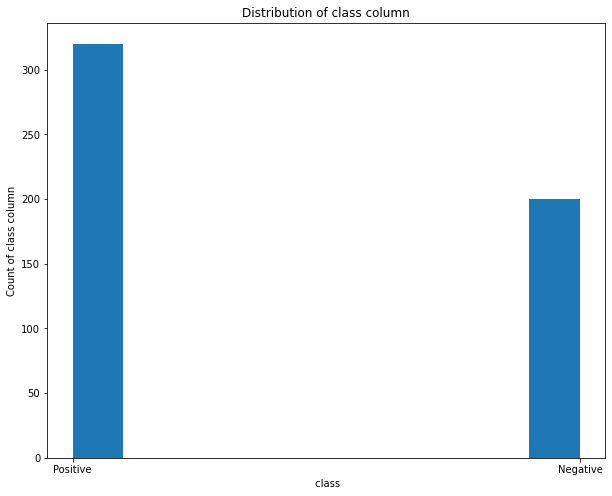

In [8]:
plt.figure(figsize=(10,8))
plt.hist(data=data ,x = 'class')
plt.title("Distribution of class column")
plt.xlabel(' class')
plt.ylabel('Count of class column')

The number of positive patients is more than negative people and the dataset is balanced.

Text(0, 0.5, 'Count of Gender types')

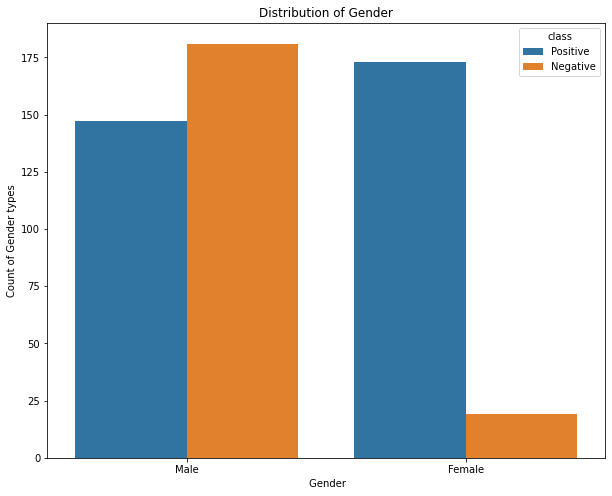

In [9]:
# Distribution of Gender
plt.figure(figsize=(10,8))
sns.countplot(x=data['Gender'],hue=data['class'],data=data)
plt.title("Distribution of Gender")
plt.xlabel(' Gender')
plt.ylabel('Count of Gender types')

The number of negative patients in male is more than  in female and we can said that the dataset is somewhat biased towards the male side.

Text(0, 0.5, 'Count of Polyuria ')

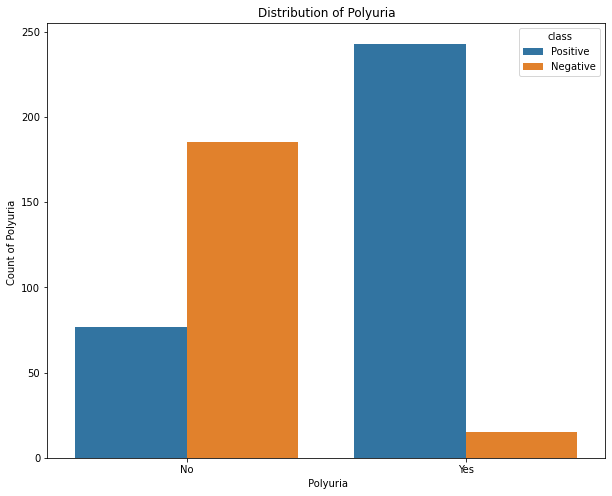

In [10]:
# Distribution of Polyuria
plt.figure(figsize=(10,8))
sns.countplot(x=data['Polyuria'],hue=data['class'],data=data)
plt.title("Distribution of Polyuria")
plt.xlabel(' Polyuria')
plt.ylabel('Count of Polyuria ')

It is clear that the presence of Polyuria signifies strong chances of diabetes in comparison to its absence.

Text(0, 0.5, 'Count of Polydipsia')

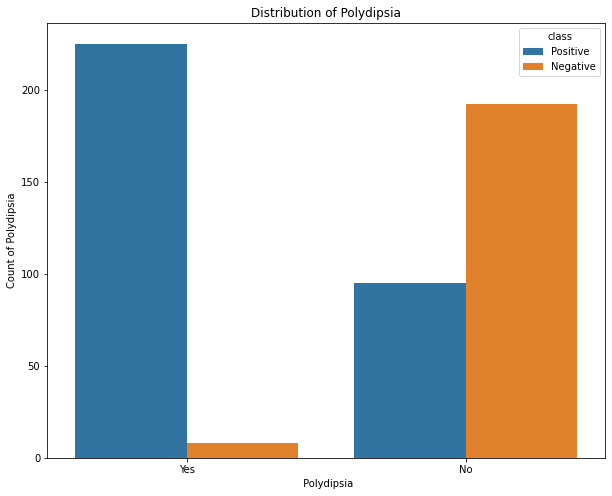

In [11]:
# Distribution of Polydipsia
plt.figure(figsize=(10,8))
sns.countplot(x=data['Polydipsia'],hue=data['class'],data=data)
plt.title("Distribution of Polydipsia")
plt.xlabel(' Polydipsia')
plt.ylabel('Count of Polydipsia')

It is clear that the presence of Polydipsia signifies strong chances of diabetes in comparison to its absence.

Text(0, 0.5, 'Count of sudden weight loss')

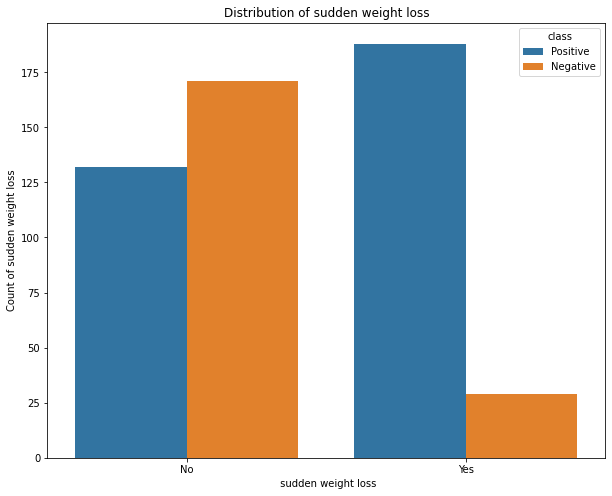

In [12]:
# Distribution of sudden weight loss
plt.figure(figsize=(10,8))
sns.countplot(x=data['sudden weight loss'],hue=data['class'],data=data)
plt.title("Distribution of sudden weight loss")
plt.xlabel(' sudden weight loss')
plt.ylabel('Count of sudden weight loss')

it is evident that patients having sudden weight loss are more prone to diabetes.

Text(0, 0.5, 'Count of weakness')

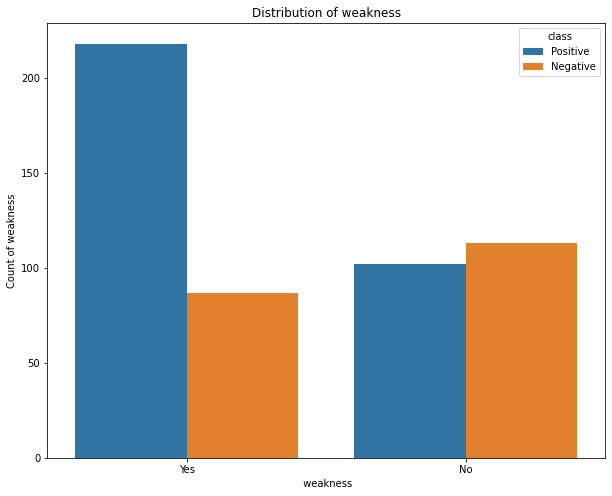

In [13]:
# Distribution of Weakness
plt.figure(figsize=(10,8))
sns.countplot(x=data['weakness'],hue=data['class'],data=data)
plt.title("Distribution of weakness")
plt.xlabel(' weakness')
plt.ylabel('Count of weakness')

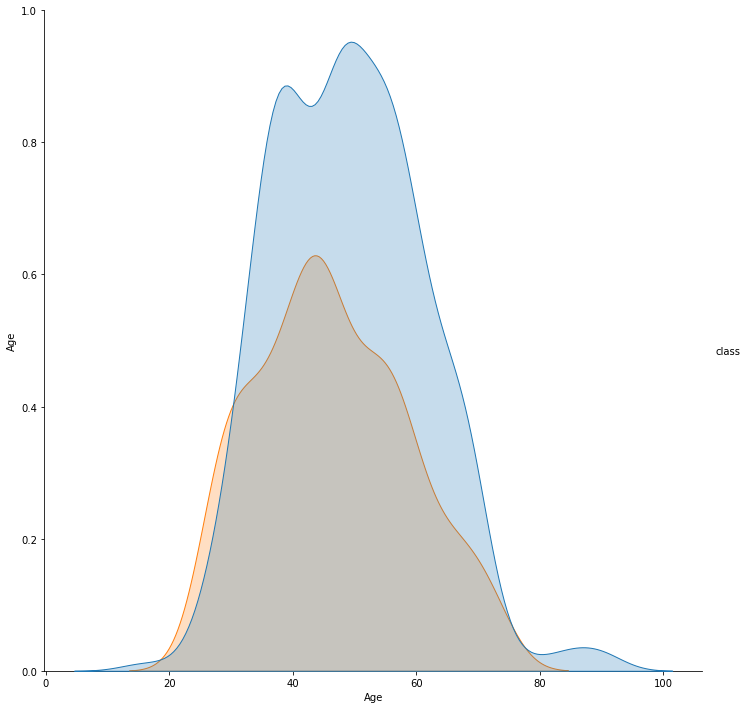

In [14]:
# Distribution of Age col
sns.pairplot(data,hue='class',size=10,)


In [15]:
# Distribution of Obesity
plot_criteria= ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


It is evident that the dataset has very less obese patients but in general.

In [16]:
# Distribution of Alopecia
plot_criteria= ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


# Data Pre-processing

In [17]:
# transforming target column from string to numeric format
values = {'Positive':1 , 'Negative' :0}
data['class'] = data['class'].map(values)

In [18]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1


# Splitting data

In [19]:
X=data.drop(['class'],axis=1)
y=data['class']

In [20]:
# converting all the features
lab_model = LabelEncoder()
for m in X:
    X[m] =  lab_model.fit_transform(X[m])
print(X.info())    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 34.7 KB

In [21]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


# Data Normalization

In [22]:
norm_model = MinMaxScaler()
X[['Age']] = norm_model.fit_transform(X[['Age']])

In [23]:
X.head(256)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.32,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0.68,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,0.34,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,0.42,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,0.72,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.62,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
252,0.30,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
253,0.38,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
254,0.22,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0


# Correlation

In [24]:
X.corrwith(y)


Age                   0.106419
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<AxesSubplot:>

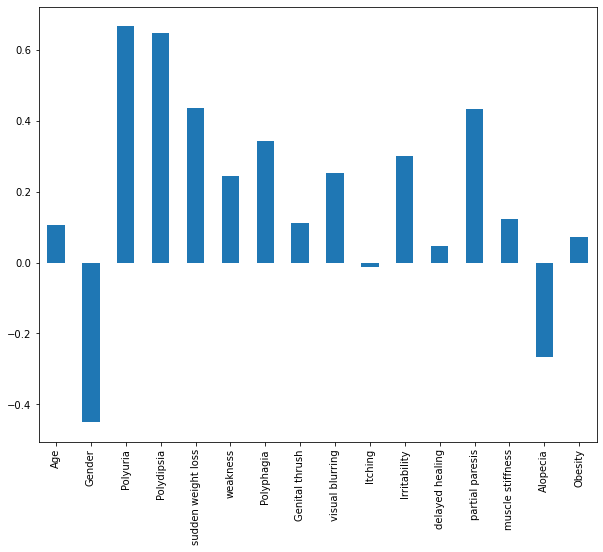

In [25]:
plt.figure(figsize=(10,8))
X.corrwith(y).plot.bar()

Polyuria and Polydipsia are the most positively correlated features with respect to diabetes whereas Gender and Alopecia are the negatively correlated features.

# Train Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 101)

In [27]:
print('Distribution of traget variable in training set')
print(y_train.value_counts())
print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    256
0    160
Name: class, dtype: int64
Distribution of traget variable in test set
1    64
0    40
Name: class, dtype: int64


# Model Building

In [31]:
# Logistic Regression (Base Model)
lo_model = LogisticRegression(random_state=101)
lo_model.fit(X_train,y_train)

LogisticRegression(random_state=101)

In [29]:
y_predict_logi = lo_model.predict(X_test)

# Model Evaluation

### 10 K_fold Cross -Validation

In [77]:
kfold = model_selection.KFold(n_splits=10)
acc_logi = cross_val_score(estimator = lo_model, X = X_train, y = y_train, cv = kfold,scoring='accuracy')
acc_logi.mean()

0.9233449477351918

In [78]:
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

In [81]:
results = pd.DataFrame([["Logistic Regression",acc,roc,prec,rec,f1,acc_logi.mean()]],columns=["Model","Acuuracy","ROC","Precision","Recall","F1_score","Cross Val Accuracy"])

In [82]:
results 

,Model,Acuuracy,ROC,Precision,Recall,F1_score,Cross Val Accuracy
0,Logistic Regression,0.923077,0.91875,0.9375,0.9375,0.9375,0.923345


Text(0.5, 1.0, 'Confession Matrix')

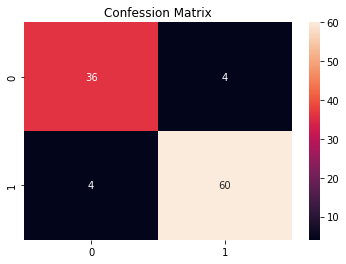

In [83]:
matrix = confusion_matrix(y_test,y_predict_logi)
sns.heatmap(matrix,annot=True)
plt.title('Confession Matrix')

It is evident that Logistic regression has done a pretty good job in identifying diabetic cases.

# Plotting Feature Importance – Logistic Regression

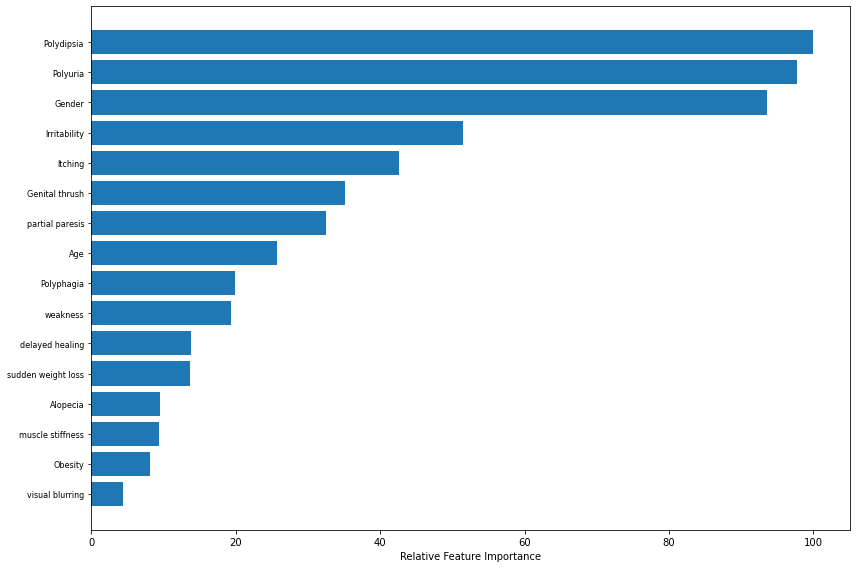

In [95]:
feature_importance = abs(lo_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3
featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

### Conclusion:
based on the above plot, the top 5 most contributing features of the logistic regression model are Polydipsia, Polyuria, Gender, Itching, and Irritability.

##  Random Forest

In [98]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [100]:
kfold = model_selection.KFold(n_splits=10)
acc_rf = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = kfold,scoring='accuracy')
acc_rf.mean()

0.971254355400697

In [103]:
y_predict_rf = rf_model.predict(X_test)

In [104]:
acc= accuracy_score(y_test, y_predict_rf)
roc=roc_auc_score(y_test,y_predict_rf)
prec = precision_score(y_test, y_predict_rf)
rec = recall_score(y_test,y_predict_rf)
f1 = f1_score(y_test,y_predict_rf)

In [105]:
results2 = pd.DataFrame([["Random Forest",acc,roc,prec,rec,f1,acc_rf.mean()]],columns=["Model","Acuuracy","ROC","Precision","Recall","F1_score","Cross Val Accuracy"])

In [106]:
results2 

,Model,Acuuracy,ROC,Precision,Recall,F1_score,Cross Val Accuracy
0,Random Forest,0.971154,0.976562,1.0,0.953125,0.976,0.971254


Text(0.5, 1.0, 'Confession Matrix')

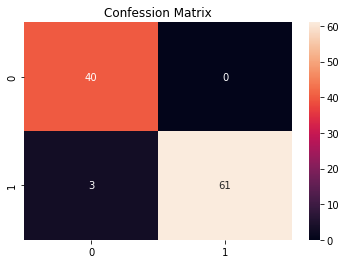

In [107]:
matrix = confusion_matrix(y_test,y_predict_rf)
sns.heatmap(matrix,annot=True)
plt.title('Confession Matrix')

# Plotting Feature Importance – Random Forest

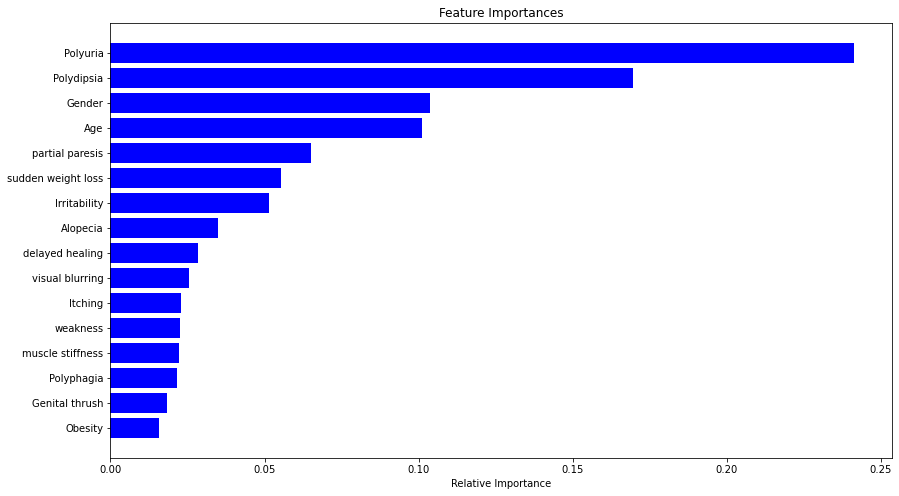

In [112]:
plt.figure(figsize=(14,8))
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From the above results, it is evident that random forest performed better on this dataset with higher precision, accuracy, f1-score, and ROC values.

## Plotting ROC AUC

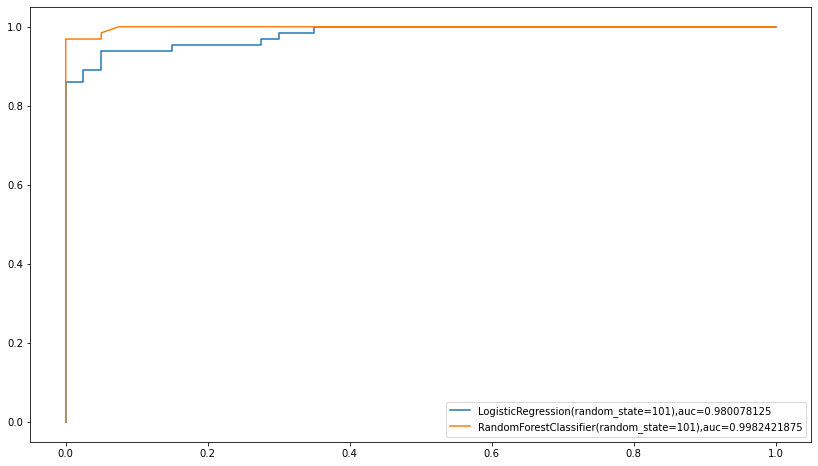

In [152]:
plt.figure(figsize=(14,8))
for model in[lo_model , rf_model]:
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="{},auc={}".format(model,str(auc)))
    plt.legend(loc=4)


The ROC curve for both Logistic regression and the Random forest algorithm to see which algorithm performed better in terms of detecting diabetes cases.